# Chapter 3 - Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

## MNIST

In [2]:
#import dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# features and target vectores - Both are dataframes

x, y = mnist['data'], mnist['target']

In [4]:
x.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [5]:
#feature vector shape

x.shape

(70000, 784)

In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
#target vector shape

y.shape

(70000,)

In [8]:
#import packages to draw

import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [9]:
some_digit = x.iloc[0].to_numpy() #select row and transform to numpy
some_digit_image = some_digit.reshape(28,28) #reshape
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

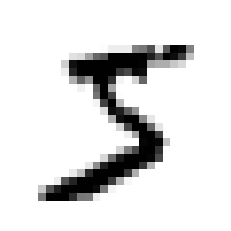

In [10]:
#plot the image

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [11]:
#target for that image

y[0]

'5'

In [12]:
#target is a string. Cast to a number

y = y.astype(np.uint8)
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

In [13]:
#train / test split manually. The datasets are already shuffled

x_train,x_test, y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 784)
Shape of y_train: (60000,)
Shape of x_test: (10000, 784)
Shape of y_test: (10000,)


## Training a Binary Classifier

In [ ]:
#Try to identify only one digit

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(f'Shape of y_train_5 is: {y_train_5.shape}')
print(f'Shape of y_test_5 is: {y_test_5.shape}')

In [ ]:
#import the classifier - SGDClassifier
from sklearn.linear_model import SGDClassifier

#instantiate the classifier
sdg_clf = SGDClassifier(random_state=42)

#fit the model with the training data
sdg_clf.fit(x_train,y_train_5)

In [ ]:
#predict about an instance that we know is a 5

sdg_clf.predict([some_digit])

## Performance Measure

### Implementing Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#instantiate the fold generator
skfolds = StratifiedKFold(n_splits=3)

#obtain the indices of the fold,generate datasets,train and show the metric
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sdg_clf)
    x_train_fold = x_train.iloc[train_index]
    y_train_fold = y_train_5.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct/len(y_test_fold)
    print(f'Accuracy is: {accuracy}')

In [ ]:
#here we use the Class cross_vale_score from sklearn to realice cross-validation in model

from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf,x_train,y_train_5,cv=3,scoring='accuracy')

In [ ]:
#dumb classifier - definition

from sklearn.base import BaseEstimator

class Nevere5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [ ]:
#apply the dumb classifier

never_5_clf = Nevere5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

## Confusion Matrix

In [ ]:
#use cross_vale_predict to obtain the predicted class per instance

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sdg_clf,x_train,y_train_5,cv=3)

In [ ]:
#using the predict classes and the true classes we can obtain the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

* 53892: Original class non-5s images and predicted by the model as non-5s images - True Negative (TN)
* 3530: Original class 5s images and predicted by the model as 5s images - True Positive (TP)
* 687: Original class non-5s and predicted by the model as 5s images - False Positive (FP)
* 1891: Original class 5s images and predicted by the model as non-5s images - False Negative (FN)

In [ ]:
#show a confusion matrix with only True Positive and True Negative

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

## Precision and Recall

In [ ]:
#calculate precision and recall

from sklearn.metrics import precision_score, recall_score

print(f'Precision Score:{round(precision_score(y_train_5, y_train_pred),3)}')
print(f'Recall Score:{round(recall_score(y_train_5, y_train_pred),3)}')

In [ ]:
#compute the F1 Score

from sklearn.metrics import f1_score

print(f'F1 Scrore: {round(f1_score(y_train_5,y_train_pred),3)}')

## Precision / Recall Trade-off

In [ ]:
#example of how obtains the decision score for some digit (5 in this case)

y_scores = sdg_clf.decision_function([some_digit])
y_scores

#set a value for the threshold and predict the target 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
#change the value of the threshold and change the predicted class

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
#In this case use cross_val_predict but obtain the score for every instance (not the class)

y_scores = cross_val_predict(sdg_clf,x_train,y_train_5,cv=3,method='decision_function')
y_scores

In [ ]:
#Compute precision and recall for every threshold

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize=(12,8))
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.title('Presicion - Recall Curve')
    plt.xlabel('Threshold value')
    plt.ylabel('Metric value')
    plt.legend()
    plt.show()

In [ ]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)


In [ ]:
#plot the sum precision + recall to see which threshold value optimize this sum

plt.figure(figsize=(12,8))
sum_precision_recall = precisions + recalls
plt.plot(thresholds,sum_precision_recall[:-1],'r',label='Presicion + Recall')
plt.title('Precision + Recall Curve')
plt.xlabel('Threshold value')
plt.ylabel('sum')

In [ ]:
#plot precision vs recall

plt.figure(figsize=(12,8))
plt.plot(recalls[:-1],precisions[:-1],label='Presicion vs Recall')
plt.title('Precision vs Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
#obtain the threshold value that produce a precision of 0.90

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

In [ ]:
#predictions using the threshold that generate precision >= 0.90

y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

In [ ]:
#check presicion and recall score

print(f'Precision scrore: {precision_score(y_train_5,y_train_pred_90)}')
print(f'Recall Score: {recall_score(y_train_5,y_train_pred_90)}')

### Extra: F1 Score vs threshold

To calculate F1 Score we need the precision and recall

We previously obtained the accuracy and recall values ​​for all thresholds. Now we can calculate the F1 score against the threshold value

In [ ]:
#custom function to obtain F1 Score

def f1_metric(precision,recall):
    return((2 * precision * recall) / (precision + recall))

In [ ]:
pair_precision_recall = zip(precisions,recalls)
f1_scores = []
for i,j in pair_precision_recall:
    f1_scores.append(f1_metric(i,j))

In [ ]:

plt.figure(figsize=(12,8))
plt.plot(thresholds,f1_scores[:-1])
plt.title('F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1')

## ROC Curve

In [ ]:
#obtain values to plot the ROC curve

from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(y_train_5,y_scores)

In [ ]:
#function to plot ROC curve

def plot_roc_curve(fpr,tpr,label=None,color=None):
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,linewidth=2,color=color,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate - FPR')
    plt.ylabel('True Positive Rate - TPR')
    plt.legend()

In [ ]:
plot_roc_curve(fpr,tpr,label='SGD')

In [ ]:
#calculate the AUC (area under the curve)

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [ ]:
#Obtain the probability that the given instance belongs to a given class

y_proba_forest

In [ ]:
#use only the probability that an instance belong to the positive class
y_score_forest = y_proba_forest[:,1]

#obtain fpr and tpr for Random Forest model
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_score_forest)

In [ ]:
plot_roc_curve(fpr,tpr,label='SGD',color='r') #ROC Curve for SGD Classifier
plot_roc_curve(fpr_forest,tpr_forest,label='Random Forest',color='b') #ROC curve for Random Forest Classifier

In [ ]:
#AUC for Random Forest Classifier

roc_auc_score(y_train_5,y_score_forest)

### Extra - Precision and Recall for Random Forest Classifier

In [ ]:
#Obtain the classes (fix threshold) using cross_val_predict

y_train_pred_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3)
y_train_pred_forest

In [ ]:
print(f'Precision Score:{round(precision_score(y_train_5, y_train_pred_forest),3)}')
print(f'Recall Score:{round(recall_score(y_train_5, y_train_pred_forest),3)}')

## Multiclass Classification

In [15]:
#try support vector machine - In this case y_train have all the classes and not only the 5's
#for support vector machine train 45 classifiers OvO

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [16]:
#with decision_function obtain 10 scores, one per class

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [17]:
#The highest score correponds to digit 5

np.argmax(some_digit_scores)

5

In [19]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#OvR using support vector classifier

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train,y_train)
ovr_clf.predict([some_digint])

In [14]:
#Train and predict with SGDClassifier
from sklearn.linear_model import SGDClassifier
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(x_train,y_train)
sdg_clf.predict([some_digit])

array([3], dtype=uint8)

In [15]:
sdg_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [17]:
#Calculate cross validaton score for SGD Classifier for multiclass classification

from sklearn.model_selection import cross_val_score

cross_val_score(sdg_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [18]:
#Calculate cross validaton score for RandomForest Classifier for multiclass classification

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.9646 , 0.96255, 0.9666 ])

RandomForest classifier obtain beters scores (aprox 10% more than SDG classifier)

In [20]:
#scaling features improves the score for SGD Classifier

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sdg_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])